# Credit card fraud detection


*   In this project I have used both Machine Learning(ML) and Deep Learning(DL)
*   Dataset that I am using has real anonymized credit card transactions.


*   Dataset contains 300000 transactions with their corresponding lavels.
*   Each row in dataset represents the user transaction with all the credit cards and user information available.

*   The objective of this project is to build the classifier that classify the given new transation is fraudulent or not.
*   List item







In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dropout, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [26]:
df = pd.read_csv('/content/creditcard.csv')
df.shape

(79318, 31)

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [28]:
df = df.dropna()

In [29]:
df.shape

(79317, 31)

In [30]:
df['Class'].unique()

array([0., 1.])

In [31]:
df['Class'] = df['Class'].astype('int')
df['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

**Data Preprocessing**

In [32]:
# converting amount column into the values which contains between -1 to 1

df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.192303
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.352603
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.041722
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.095434
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.103014


In [33]:
# removing Unnecessory columns

df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.192303
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.352603
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.041722
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.095434
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.103014


**Feature Selection**

In [34]:
x = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
print(x.shape, y.shape)

(79317, 29) (79317, 1)


In [35]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.192303
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.352603
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.041722
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.095434
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.103014


In [36]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


**Data Splitting**

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(63453, 29) (15864, 29) (63453, 1) (15864, 1)


# **Machine Learning Technique**

**1. Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [40]:
y_pred = rf.predict(x_test)
rf.score(x_test, y_test)

0.9996848209783157

CM, without normalization
[[15818     1]
 [    4    41]]


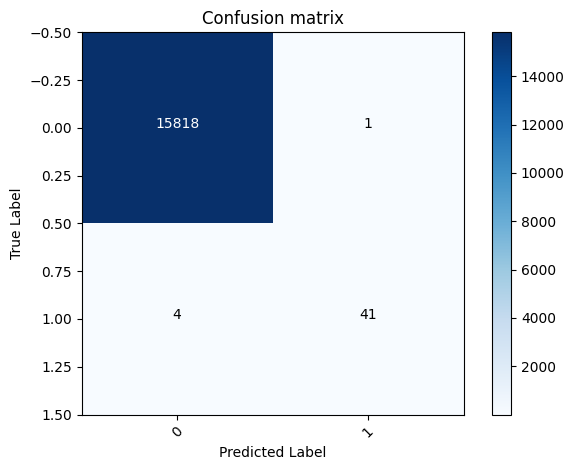

In [41]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

CM, without normalization
[[79125     1]
 [    4   187]]


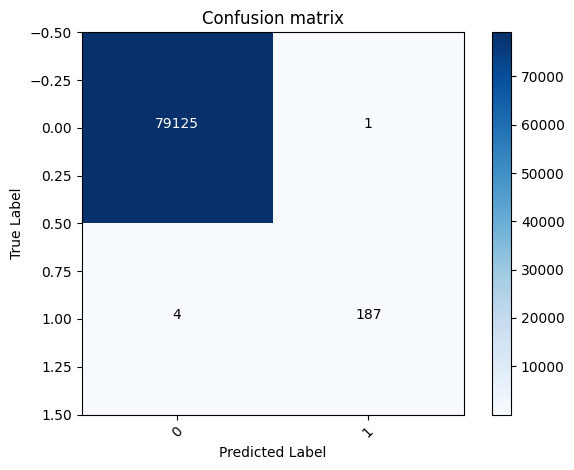

In [42]:
y_pred = rf.predict(x)
cm = confusion_matrix(y, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

**2. Decision Trees**

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train.values.ravel())

DecisionTreeClassifier()

In [50]:
y_pred = dt.predict(x)
dt.score(x, y)

0.99983610070981

CM, without normalization
[[79119     7]
 [    6   185]]


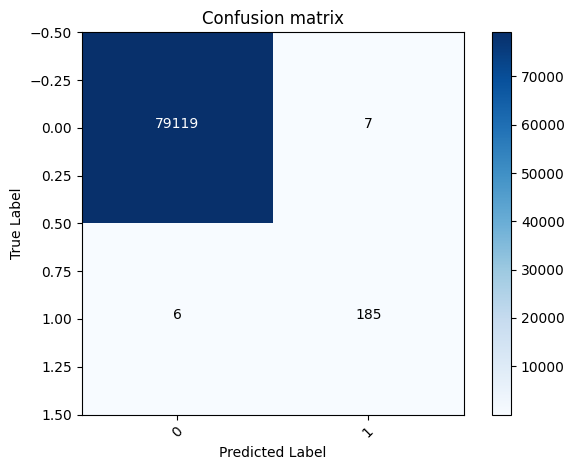

In [51]:
cm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

**3. Sampling**

In [52]:
fraud = np.array(df[df.Class == 1].index)
no_rec = len(fraud)
print("No of Fraud Records: ", no_rec)

No of Fraud Records:  191


In [53]:
normal_indics = df[df.Class == 0].index

In [55]:
random_normal_indics = np.random.choice(normal_indics, no_rec, replace=False)
random_normal_indics = np.array(random_normal_indics)
print("random normal indices: ", len(random_normal_indics))

random normal indices:  191


In [58]:
under_sample_indices = np.concatenate([fraud, random_normal_indics])
print("under sample indices: ", len(under_sample_indices))

under sample indices:  382


In [59]:
under_sample_data = df.iloc[under_sample_indices, :]

In [60]:
# spliting data into x and y set
x_sample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_sample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(305, 29) (77, 29) (305, 1) (77, 1)


In [62]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [64]:
model = Sequential([
    Dense(units= 16, input_dim = 29, activation = 'relu'),
    Dense(units= 24, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7.4

In [65]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
21/21 [==============================] - 7s 9ms/step - loss: 0.6063 - accuracy: 0.7180
Epoch 2/5
21/21 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.7836
Epoch 3/5
21/21 [==============================] - 0s 6ms/step - loss: 0.4010 - accuracy: 0.8787
Epoch 4/5
21/21 [==============================] - 0s 8ms/step - loss: 0.3670 - accuracy: 0.8689
Epoch 5/5
21/21 [==============================] - 0s 7ms/step - loss: 0.2975 - accuracy: 0.9049


2479/2479 [==============================] - 10s 4ms/step
CM, without normalization
[[78157   969]
 [   23   168]]


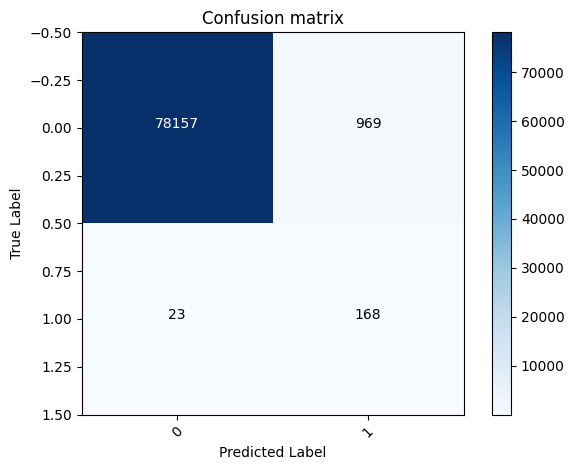

In [69]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

# **Deep Learning Model Builing**

In [96]:
# transform data sets into array

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [97]:
model = Sequential([
    Dense(units= 16, input_dim = 29, activation = 'relu'),
    Dense(units= 24, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                480       
                                                                 
 dense_16 (Dense)            (None, 24)                408       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_17 (Dense)            (None, 20)                500       
                                                                 
 dense_18 (Dense)            (None, 24)                504       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7

**Model Training**

In [100]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
15190/15190 [==============================] - 50s 3ms/step - loss: 0.0045 - accuracy: 0.9992
Epoch 2/5
15190/15190 [==============================] - 49s 3ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 3/5
15190/15190 [==============================] - 45s 3ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 4/5
15190/15190 [==============================] - 45s 3ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 5/5
15190/15190 [==============================] - 45s 3ms/step - loss: 0.0033 - accuracy: 0.9994


In [101]:
score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 5s 3ms/step - loss: 0.0031 - accuracy: 0.9995
[0.003098537912592292, 0.9994909167289734]


**Model Evaluation**

In [17]:
import itertools
from sklearn import datasets, svm

def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion matrix", cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized cm")
  else:
    print("CM, without normalization")
  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.xticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else 'black')
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.tight_layout()

In [103]:
y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)

1781/1781 [==============================] - 3s 2ms/step


[[56850    11]
 [   18    83]]


<Axes: >

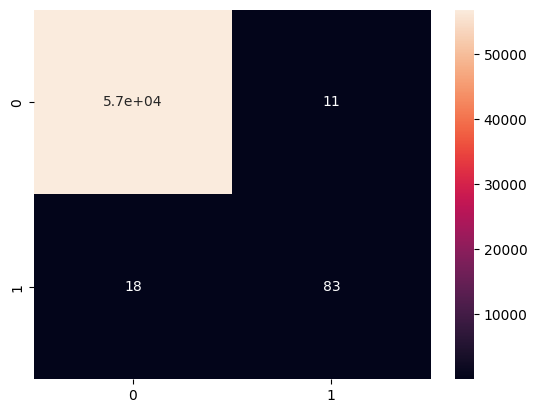

In [104]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
sns.heatmap(cm, annot=True)

CM, without normalization
[[56850    11]
 [   18    83]]


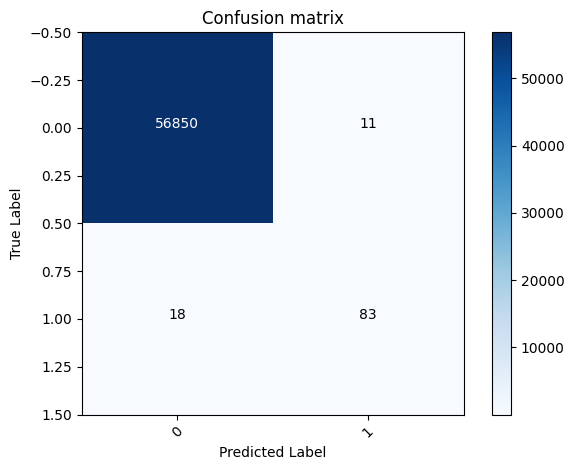

In [105]:
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

8901/8901 [==============================] - 17s 2ms/step
CM, without normalization
[[284256     59]
 [    92    400]]


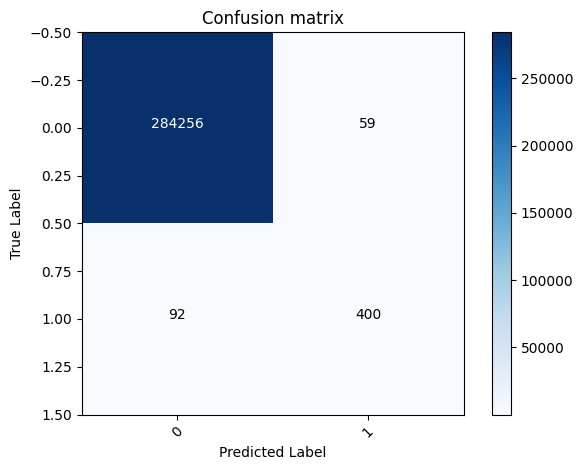

In [106]:
y_pred = model.predict(x)
y_expect = pd.DataFrame(y)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])
plt.show()